In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/methods/GenLinCFA")
from GenLinCFA import GenLinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_GenLinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,aggregate_unfolded_data_onlyTrain,FS_with_linearWrapper,FS_with_logisticWrapper,compare_methods,compare_methods_class,compute_r2,prepare_target_binary


In [1]:
path_target = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/csv_VHI/'
basins = ['Adda','Dora','Emiliani1','Emiliani2','Garda_Mincio','Lambro_Olona','Oglio_Iseo','Piemonte_Nord','Piemonte_Sud','Ticino']
path_features='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'

#basin='Emiliani2'
#df = pd.read_csv(path_features+basin+'_aggreg.csv')
#tar = pd.read_csv(path_target+basin+'.csv')

# Gaussian

In [3]:
### BOTH
for basin in basins:
    print('####################' + basin + '####################')

    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+basin+'.csv')

    eps = 0.37
    actual_path = path_features+basin+'_aggreg.csv'
        
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(actual_path,['cyclostationary_mean_tg', 
                                                                             'cyclostationary_mean_tg_1w',
                                                                             'cyclostationary_mean_tg_4w', 
                                                                             'cyclostationary_mean_tg_8w',
                                                                             'cyclostationary_mean_tg_12w', 
                                                                             'cyclostationary_mean_tg_16w',
                                                                             'cyclostationary_mean_tg_24w',
                                                                             'cyclostationary_mean_rr', 
                                                                             'cyclostationary_mean_rr_1w',
                                                                             'cyclostationary_mean_rr_4w', 
                                                                             'cyclostationary_mean_rr_8w',
                                                                             'cyclostationary_mean_rr_12w', 
                                                                             'cyclostationary_mean_rr_16w',
                                                                             'cyclostationary_mean_rr_24w'
                                                                            ],
                                                                       target_df_trainVal, eps=eps,
                                                                       max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
        
    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    print('\nFull model and selected features with wrapper\n')
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with wrapper\n')
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    res = {
            "delta" : [], 
            "numSelected" : [], 
            "selectedFeatures" : [] 
        }
        
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
        
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    
    print('\nFull model and selected features with CMI\n')
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with CMI\n')
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        

####################Adda####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.039373    0.00  2001     1 -2.546951
1    2001-01-13  0.380618    0.43  2001     2 -0.277191
2    2001-01-21  0.341985    0.38  2001     3 -0.534156
3    2001-01-29  0.322044    0.35  2001     5 -0.666789
4    2001-02-06  0.354954    0.40  2001     6 -0.447894
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.382706    0.40  2009    48 -0.263306
407  2009-12-05  0.409921    0.46  2009    49 -0.082282
408  2009-12-13  0.472087    0.53  2009    50  0.331204
409  2009-12-21  0.324728    0.00  2009    52 -0.648940
410  2009-12-29  0.086512    0.00  2009    53 -2.233412

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 92

Number of aggregated features: 10

Number of features: 92

1
7
Number of aggregated features: 7

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of

Number of features: 44

1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
Number of aggregated features: 6

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
7
Number of aggregated features: 7

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated

Number of features: 172

88
56
28
17
6
Number of aggregated features: 6

Number of features: 172

17
12
4
Number of aggregated features: 4

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
Number of aggregated features: 3

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 172

1
3
Number of aggregated features: 3

Number of features: 172

133
117
94
69
49
31
18
9
Number of aggregated features: 9

Number of features: 172

143
135
120
105
93
78
61
46
33
16
7
Number of aggregated features: 7

Number of features: 172

155
150
146
134
124
117
98
76
65
48
32
15
7
Number of aggregated features: 7

Number of features: 

CMI: 0.0028893807692448314
CMI: 0.003723769824050649
CMI: 0.0010860396455165122
CMI: 0.0003258582751975436
Highest CMI score: 0.003994491590338267
Adding original feature: 5
CMI: 0.0005508590244994727
CMI: 0.0025830992326107416
CMI: 0.00043249435093006827
Highest CMI score: 0.0025830992326107416
Adding original feature: 27
CMI: 0.00025319461225342677
CMI: 0.0018437363641453097
Highest CMI score: 0.0018437363641453097
Adding original feature: 48
Highest CMI score: -0.0007258672640605424

[41, 3, 73, 51, 61, 8, 24, 5, 27, 48]


Full model and selected features with CMI

Full aggregate regression train score: 0.5264722419519537, test score: -0.46714710829884676
Aggregate regression train score with FS: 0.38723644310837724, test score: 0.28727470927844356

Full model and best 5 selected features with CMI

Full aggregate regression train score: 0.5264722419519537, test score: -0.46714710829884676
Aggregate regression train score with FS: 0.37627585594231205, test score: 0.22876294115027085


Number of features: 67

1
1
1
3
Number of aggregated features: 3

Number of features: 67

1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
Number of aggregated features: 10

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
Number of aggregated features: 13

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
Number of aggregated features: 9

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
9
Number of aggregated features: 9

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 67

1
1
2
7
Number of aggregated featu

Number of features: 55

43
34
24
15
5
Number of aggregated features: 5

Number of features: 55

28
22
13
4
Number of aggregated features: 4

Number of features: 55

1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
Number of aggregated features: 6

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
10
Number of aggregated features: 10

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
Number of aggregated features: 7

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
Number of aggregated features: 5

Number of fea

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
8
Number of aggregated features: 8

Number of features: 74

1
1
1
1
1
1
1
1
1
6
Number of aggregated features: 6

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
6
Number of aggregated features: 6

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
Number of aggregated features: 5

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3



selected columns: ['cyclostationary_mean_tg_1w_2', 'cyclostationary_mean_rr_4w_0', 'cyclostationary_mean_rr_16w_1', 'cyclostationary_mean_rr_8w_4', 'cyclostationary_mean_rr_8w_3', 'cyclostationary_mean_tg_8

Number of features: 89

1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 89

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 89

1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5



selected columns: ['cyclostationary_mean_tg_1w_2', 'cyclostationary_mean_rr_24w_2', 'cyclostationary_mean_rr_1w_3', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_tg_1w_7', 'cyclostationary_mean_rr_24w_1', 'cyclostationary_mean_tg_16w_3', 'cyclostationary_mean_rr_24w_3', 'cyclostationary_mean_tg_4w_0', 'cyclostationary_mean_tg_4w_11', 'cyclostationary_mean_tg_4w_3', 'cyclostationary_mean_tg_24w_1', 'cyclostationary_mean_rr_8w_4', 'cyclostationary_mean_tg_4w_2', 'cyclostationary_mean_tg_4w_9', 'cyclostationary_mean_tg_4w_4', 'cyclostationary_mean_tg_4w_10', 'cyclostationary_mean_rr_24w_0', 'cyclostationary_mean_tg_4w_5', 'cyclostationary_mean_tg_8w_10', 'cyclostationary_mean_rr_3', 'cyclostationary_mean_tg_4w_7', 'cyclos

1
1
1
1
9
Number of aggregated features: 9

Number of features: 176

1
1
1
1
1
1
7
Number of aggregated features: 7

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
8
Number of aggregated features: 8

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
Number of aggregated features: 2

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
Number of aggregated features: 2

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Nu

Number of features: 92

42
26
17
6
Number of aggregated features: 6

Number of features: 92

30
17
7
Number of aggregated features: 7

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
10
Number of aggregated features: 10

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
Number of aggregated features: 11

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
6
Number of aggregated features: 6

Number of features: 92

1
1
1
1
1
1
1
1
1
1
2
2
2
3
Number of 

# Logistic

In [6]:
### BOTH
for basin in basins:
    print('####################' + basin + '####################')

    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+basin+'.csv')

    eps = 0.37
    actual_path = path_features+basin+'_aggreg.csv'
        
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(actual_path,['cyclostationary_mean_tg', 
                                                                             'cyclostationary_mean_tg_1w',
                                                                             'cyclostationary_mean_tg_4w', 
                                                                             'cyclostationary_mean_tg_8w',
                                                                             'cyclostationary_mean_tg_12w', 
                                                                             'cyclostationary_mean_tg_16w',
                                                                             'cyclostationary_mean_tg_24w',
                                                                             'cyclostationary_mean_rr', 
                                                                             'cyclostationary_mean_rr_1w',
                                                                             'cyclostationary_mean_rr_4w', 
                                                                             'cyclostationary_mean_rr_8w',
                                                                             'cyclostationary_mean_rr_12w', 
                                                                             'cyclostationary_mean_rr_16w',
                                                                             'cyclostationary_mean_rr_24w'
                                                                            ],
                                                                       target_df_trainVal, eps=eps,
                                                                       max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
        
    selected_colnames = FS_with_logisticWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    print('\nFull model and selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    res = {
            "delta" : [], 
            "numSelected" : [], 
            "selectedFeatures" : [] 
        }
        
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.apply(lambda x: np.sign(x.mean_std), axis=1)),res,10,1)
        
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    
    print('\nFull model and selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        

####################Adda####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.039373    0.00  2001     1 -2.546951
1    2001-01-13  0.380618    0.43  2001     2 -0.277191
2    2001-01-21  0.341985    0.38  2001     3 -0.534156
3    2001-01-29  0.322044    0.35  2001     5 -0.666789
4    2001-02-06  0.354954    0.40  2001     6 -0.447894
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.382706    0.40  2009    48 -0.263306
407  2009-12-05  0.409921    0.46  2009    49 -0.082282
408  2009-12-13  0.472087    0.53  2009    50  0.331204
409  2009-12-21  0.324728    0.00  2009    52 -0.648940
410  2009-12-29  0.086512    0.00  2009    53 -2.233412

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 92

Number of aggregated features: 10

Number of features: 92

1
7
Number of aggregated features: 7

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_rr_8w_7', 'cyclostationary_mean_tg_1w_4', 'cyclostationary_mean_rr_4w_0', 'cyclostationary_mean_rr_8w_0', 'cyclostationary_mean_rr_16w_1', 'cyclostationary_mean_rr_16w_6', 'cyclostationary_mean_rr_8w_4', 'cyclostationary_mean_rr_8w_9', 'cyclostationary_mean_tg_12w_2', 'cyclostationary_mean_tg_24w_2', 'cyclostationary_mean_tg_12w_4', 'cyclostationary_mean_rr_8w_2', 'cyclostationary_mean_rr_8w_6', 'cyclostationary_mean_rr_16w_4', 'cyclostationary_mean_rr_16w_0', 'cyclostationary_mean_tg_16w_1', 'cyclostationary_mean_rr_8w_3', 'cyclostationary_mean_tg_16w_2', 'cyclostationary_mean_rr_16w_8', 'cyclostationary_mean_rr_16w_7', 'cyclostationary_mean_rr_1w_0', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_rr_0', 'cyclostationary_mean_rr_8w_8', 'cyclostationary_mean_rr_1w_1', 'cyclostationary_mean_tg_24w_0', 'cyclostationary_mean_rr_16w_2', 'cyclostationary_mean_rr_24w_2', 'cyclostationary_mean_rr_24w_4', 'cyclos

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 44

1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
Number of aggregated features: 6

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
7
Number of aggregated features: 7

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 44

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_rr_12w_4', 'cyclostationary_mean_tg_4w_3', 'cyclostationary_mean_tg_12w_0', 'cyclostationary_mean_tg_8w_0', 'cyclostationary_mean_rr_4', 'cyclostationary_mean_rr_1w_0', 'cyclostationary_mean_rr_8w_2', 'cyclostationary_mean_rr_4w_0', 'cyclostationary_mean_rr_24w_1', 'cyclostationary_mean_rr_12w_3', 'cyclostationary_mean_rr_5'], 

validation score: 0.7149122807017544, 

number of selected features: 12

Full model and selected features with wrapper

Full aggregate classification train score: 0.6604068857589984, test score: 0.5350877192982456
Aggregate classification train score with FS: 0.621283255086072, test score: 0.5394736842105263

Full model and best 5 selected features with wrapper

Full aggregate classification train score: 0.6604068857589984, test score: 0.5350877192982456
Aggregate classification train score with FS: 0.6244131455399061, test score: 0.5307017543859649
----- MI Scores -----
[(1, 0.067469268

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 172

88
56
28
17
6
Number of aggregated features: 6

Number of features: 172

17
12
4
Number of aggregated features: 4

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
Number of aggregated features: 3

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 172

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 172

1
3
Number of aggregated features: 3

Number of features: 172

133
117
94
69
49
31
18
9
Number of aggregated features: 9

Number of features: 172

143
135
120
105
93
78
61
46
33
16
7
Number of aggregated features: 7

Number of features: 172

155
150
146
134
124
117
98
76
65
48
32
15
7
Number of aggregated features: 7

Number of features: 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_rr_8w_0', 'cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_tg_4w_4', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_tg_8w_2', 'cyclostationary_mean_tg_12w_0', 'cyclostationary_mean_tg_8w_1', 'cyclostationary_mean_tg_16w_4', 'cyclostationary_mean_tg_1w_3', 'cyclostationary_mean_tg_24w_0'], 

validation score: 0.8640350877192983, 

number of selected features: 10

Full model and selected features with wrapper

Full aggregate classification train score: 0.7668231611893583, test score: 0.7105263157894737
Aggregate classification train score with FS: 0.730829420970266, test score: 0.7368421052631579

Full model and best 5 selected features with wrapper

Full aggregate classification train score: 0.7668231611893583, test score: 0.7105263157894737
Aggregate classification train score with FS: 0.7198748043818466, test score: 0.7236842105263158
----- MI Scores -----
[(54, 0.11603246919351867), (49, 0.10683773725954045), (48, 0.1025466833662

CMI: 0.001380718920022922
CMI: 0.001124390539228498
CMI: 0.0002689238279685868
CMI: 0.0033535655871644587
CMI: 0.0016644370125071806
Highest CMI score: 0.0033535655871644587
Adding original feature: 61
CMI: 0.0006507680568029195
CMI: 0.0006874731868887207
CMI: 0.00044799712206730624
Highest CMI score: 0.0006874731868887207
Adding original feature: 23
CMI: 5.298073779283485e-05
Highest CMI score: 5.298073779283485e-05
Adding original feature: 16
CMI: 0.00036437435318245615
CMI: 0.0011247537799914387
CMI: 0.0003348646702019953
CMI: 0.0005117238613834563
Highest CMI score: 0.0011247537799914387
Adding original feature: 4
CMI: 0.00011703878628135933
CMI: 0.00025964832530700477
CMI: 0.0008018412587174617
Highest CMI score: 0.0008018412587174617
Adding original feature: 53
CMI: 0.0001985846552474968
CMI: 0.0007851305148111332
CMI: 4.3331452524969505e-05
CMI: 0.0002203599785575161
Highest CMI score: 0.0007851305148111332
Adding original feature: 25
Highest CMI score: -5.849579062011667e-05

[

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 130

Number of aggregated features: 8

Number of features: 130

2
5
Number of aggregated features: 5

Number of features: 130

1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 130

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 130

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 130

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 130

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 130

1
1
1
1
1
1
1
1
1
1
2
9
Number of aggregated features: 9

Number of features: 130

1
2
7
Number of aggregated features: 7

Number of features: 130

1
1
6
Number of aggregated features: 6

Number of features: 130

1
6
Number of aggregated features: 6

Number of features: 130

1
1
1
1
1
1
1
6
Number of aggregated

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_rr_8w_1', 'cyclostationary_mean_tg_7', 'cyclostationary_mean_rr_8w_2', 'cyclostationary_mean_tg_0', 'cyclostationary_mean_rr_8w_3', 'cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_rr_8w_5', 'cyclostationary_mean_rr_12w_0', 'cyclostationary_mean_tg_1', 'cyclostationary_mean_tg_1w_2'], 

validation score: 0.8245614035087719, 

number of selected features: 10

Full model and selected features with wrapper

Full aggregate classification train score: 0.7636932707355243, test score: 0.7368421052631579
Aggregate classification train score with FS: 0.6979655712050078, test score: 0.7105263157894737

Full model and best 5 selected features with wrapper

Full aggregate classification train score: 0.7636932707355243, test score: 0.7368421052631579
Aggregate classification train score with FS: 0.7057902973395931, test score: 0.6973684210526315
----- MI Scores -----
[(42, 0.095804070893049), (41, 0.09416961777055488), (61, 0.08627914665041254), (40, 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 67

1
1
1
3
Number of aggregated features: 3

Number of features: 67

1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
10
Number of aggregated features: 10

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
2
13
Number of aggregated features: 13

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
Number of aggregated features: 9

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
9
Number of aggregated features: 9

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 67

1
1
2
7
Number of aggregated featu

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_rr_8w_2', 'cyclostationary_mean_rr_1w_6', 'cyclostationary_mean_rr_8w_0', 'cyclostationary_mean_rr_12w_6', 'cyclostationary_mean_rr_4w_0', 'cyclostationary_mean_tg_8w_8', 'cyclostationary_mean_tg_8w_9', 'cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_rr_8w_1', 'cyclostationary_mean_tg_4w_1', 'cyclostationary_mean_rr_24w_0'], 

validation score: 0.881578947368421, 

number of selected features: 11

Full model and selected features with wrapper

Full aggregate classification train score: 0.7621283255086072, test score: 0.7149122807017544
Aggregate classification train score with FS: 0.7104851330203443, test score: 0.7149122807017544

Full model and best 5 selected features with wrapper

Full aggregate classification train score: 0.7621283255086072, test score: 0.7149122807017544
Aggregate classification train score with FS: 0.6901408450704225, test score: 0.6885964912280702
----- MI Scores -----
[(53, 0.10285130933027264), (54, 0.086934007

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 55

43
34
24
15
5
Number of aggregated features: 5

Number of features: 55

28
22
13
4
Number of aggregated features: 4

Number of features: 55

1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
Number of aggregated features: 6

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
10
Number of aggregated features: 10

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
Number of aggregated features: 7

Number of features: 55

1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
Number of aggregated features: 5

Number of fea

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_3', 'cyclostationary_mean_rr_1w_4', 'cyclostationary_mean_tg_24w_2', 'cyclostationary_mean_rr_16w_2', 'cyclostationary_mean_tg_4w_0', 'cyclostationary_mean_rr_16w_0', 'cyclostationary_mean_tg_24w_0', 'cyclostationary_mean_rr_4w_6', 'cyclostationary_mean_tg_16w_5', 'cyclostationary_mean_tg_24w_6', 'cyclostationary_mean_rr_1w_1', 'cyclostationary_mean_rr_24w_1', 'cyclostationary_mean_rr_24w_0', 'cyclostationary_mean_rr_1w_0', 'cyclostationary_mean_rr_8w_3', 'cyclostationary_mean_rr_4w_4', 'cyclostationary_mean_rr_4w_3', 'cyclostationary_mean_rr_8w_0', 'cyclostationary_mean_rr_16w_5'], 

validation score: 0.7675438596491229, 

number of selected features: 19

Full model and selected features with wrapper

Full aggregate classification train score: 0.7449139280125195, test score: 0.6622807017543859
Aggregate classification train score with FS: 0.6619718309859155, test score: 0.6973684210526315

Full model and best 5 selected features with wr

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 74

1
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
Number of aggregated features: 1

Number of features: 74

1
1
3
Number of aggregated features: 3

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
8
Number of aggregated features: 8

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
Number of aggregated features: 7

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 74

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
8
Number of aggregated features: 8

Number 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_rr_8w_5', 'cyclostationary_mean_rr_12w_2', 'cyclostationary_mean_tg_16w_3', 'cyclostationary_mean_rr_12w_3', 'cyclostationary_mean_rr_16w_0', 'cyclostationary_mean_tg_1w_0'], 

validation score: 0.793859649122807, 

number of selected features: 7

Full model and selected features with wrapper

Full aggregate classification train score: 0.7214397496087637, test score: 0.6842105263157895
Aggregate classification train score with FS: 0.6807511737089202, test score: 0.6447368421052632

Full model and best 5 selected features with wrapper

Full aggregate classification train score: 0.7214397496087637, test score: 0.6842105263157895
Aggregate classification train score with FS: 0.6635367762128326, test score: 0.6754385964912281
----- MI Scores -----
[(36, 0.06853188279074499), (0, 0.06838984338210802), (37, 0.0671108431816779), (39, 0.06470526276221414), (2, 0.06464291050732981), (31, 0.06286868734796644), (34, 0.0610

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 89

47
23
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
Number of aggregated features: 1

Number of features: 89

20
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
1
12
Number of aggregated features: 12

Number of features: 89

1
1
1
1
1
1
1
1
1
1
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
1
16
Number of aggregated features: 16

Number of features: 89

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
12
1
12
1
12
1
12
1
12


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_3', 'cyclostationary_mean_rr_16w_0', 'cyclostationary_mean_tg_1w_7', 'cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_tg_16w_1', 'cyclostationary_mean_tg_1w_6', 'cyclostationary_mean_rr_24w_0', 'cyclostationary_mean_tg_1w_8', 'cyclostationary_mean_tg_1w_11', 'cyclostationary_mean_tg_1w_10', 'cyclostationary_mean_tg_1w_2', 'cyclostationary_mean_tg_1w_9', 'cyclostationary_mean_tg_1w_4', 'cyclostationary_mean_tg_1w_5', 'cyclostationary_mean_tg_8w_4', 'cyclostationary_mean_tg_8w_7', 'cyclostationary_mean_tg_8w_0', 'cyclostationary_mean_tg_8w_1', 'cyclostationary_mean_tg_8w_3', 'cyclostationary_mean_tg_8w_8', 'cyclostationary_mean_tg_12w_0', 'cyclostationary_mean_tg_8w_10', 'cyclostationary_mean_tg_16w_0', 'cyclostationary_mean_tg_8w_2', 'cyclostationary_mean_tg_8w_5', 'cyclostationary_mean_tg_8w_11'], 

validation score: 0.7807017543859649, 

number of selected features: 26

Full model and selected features with wrapper

Full aggregate 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 176

1
1
1
1
9
Number of aggregated features: 9

Number of features: 176

1
1
1
1
1
1
7
Number of aggregated features: 7

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
8
Number of aggregated features: 8

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
Number of aggregated features: 5

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
20
2
Number of aggregated features: 2

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
17
2
Number of aggregated features: 2

Number of features: 176

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_rr_24w_0', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_rr_16w_5', 'cyclostationary_mean_tg_1w_3', 'cyclostationary_mean_tg_4w_5'], 

validation score: 0.75, 

number of selected features: 5

Full model and selected features with wrapper

Full aggregate classification train score: 0.704225352112676, test score: 0.6929824561403509
Aggregate classification train score with FS: 0.6713615023474179, test score: 0.6754385964912281

Full model and best 5 selected features with wrapper

Full aggregate classification train score: 0.704225352112676, test score: 0.6929824561403509
Aggregate classification train score with FS: 0.6713615023474179, test score: 0.6754385964912281
----- MI Scores -----
[(49, 0.07992736408952518), (52, 0.07704293452754576), (55, 0.07423200745879073), (7, 0.06263216534153423), (54, 0.05750051361552218), (46, 0.055142302003120654), (8, 0.05342097151546021), (3, 0.05304006139720784), (12, 0.05190062709780834), (56, 0.049

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Number of features: 92

42
26
17
6
Number of aggregated features: 6

Number of features: 92

30
17
7
Number of aggregated features: 7

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
10
Number of aggregated features: 10

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
1
11
Number of aggregated features: 11

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
6
Number of aggregated features: 6

Number of features: 92

1
1
1
1
1
1
1
1
1
1
2
2
2
3
Number of 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_tg_12w_0', 'cyclostationary_mean_tg_1w_2', 'cyclostationary_mean_tg_16w_2', 'cyclostationary_mean_tg_8w_0', 'cyclostationary_mean_tg_8w_8', 'cyclostationary_mean_tg_4w_3', 'cyclostationary_mean_tg_4w_0', 'cyclostationary_mean_tg_4w_8', 'cyclostationary_mean_tg_4w_4', 'cyclostationary_mean_tg_4w_6', 'cyclostationary_mean_tg_4w_5', 'cyclostationary_mean_tg_4w_7', 'cyclostationary_mean_tg_16w_0', 'cyclostationary_mean_tg_8w_2', 'cyclostationary_mean_tg_8w_3', 'cyclostationary_mean_tg_8w_1', 'cyclostationary_mean_tg_8w_4', 'cyclostationary_mean_tg_8w_7', 'cyclostationary_mean_tg_8w_10', 'cyclostationary_mean_tg_16w_1', 'cyclostationary_mean_tg_24w_1', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_tg_1w_3', 'cyclostationary_mean_tg_1w_4', 'cyclostationary_mean_tg_1w_6', 'cyclostationary_mean_rr_4w_0', 'cyclostationary_mean_rr_24w_0', 'cyclostationary_mean_tg_4w_9', 'cyclostationary_mean_tg_4w_1', 'cyclostatio

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

# Logistic with binary target for aggregation

In [4]:
### BOTH
path_target = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/csv_VHI/'
basins = ['Adda','Dora','Emiliani1','Emiliani2','Garda_Mincio','Lambro_Olona','Oglio_Iseo','Piemonte_Nord','Piemonte_Sud','Ticino']
path_features='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'

for basin in basins:
    print('####################' + basin + '####################')

    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+basin+'.csv')
    target_df_trainVal['mean_std'] = target_df_trainVal.apply(lambda x: np.sign(x.mean_std), axis=1)
    eps = 0.37
    actual_path = path_features+basin+'_aggreg.csv'
        
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(actual_path,['cyclostationary_mean_tg', 
                                                                             'cyclostationary_mean_tg_1w',
                                                                             'cyclostationary_mean_tg_4w', 
                                                                             'cyclostationary_mean_tg_8w',
                                                                             'cyclostationary_mean_tg_12w', 
                                                                             'cyclostationary_mean_tg_16w',
                                                                             'cyclostationary_mean_tg_24w',
                                                                             'cyclostationary_mean_rr', 
                                                                             'cyclostationary_mean_rr_1w',
                                                                             'cyclostationary_mean_rr_4w', 
                                                                             'cyclostationary_mean_rr_8w',
                                                                             'cyclostationary_mean_rr_12w', 
                                                                             'cyclostationary_mean_rr_16w',
                                                                             'cyclostationary_mean_rr_24w'
                                                                            ],
                                                                       target_df_trainVal, eps=eps,
                                                                       max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
        
    selected_colnames = FS_with_logisticWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    print('\nFull model and selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_train.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_val.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_test.csv'
    #aggregate_trainVal.loc[:410,selected_colnames[0:5]].to_csv(train_string, index=False)
    #aggregate_trainVal.loc[411:,selected_colnames[0:5]].to_csv(val_string, index=False)
    #aggregate_test.loc[:,selected_colnames[0:5]].to_csv(test_string, index=False)

    res = {
            "delta" : [], 
            "numSelected" : [], 
            "selectedFeatures" : [] 
        }
        
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    
    print('\nFull model and selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_train.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_val.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_test.csv'
            
    #aggregate_trainVal.loc[:410,selected_colnames[0:5]].to_csv(train_string, index=False)
    #aggregate_trainVal.loc[411:,selected_colnames[0:5]].to_csv(val_string, index=False)
    #aggregate_test.loc[:,selected_colnames[0:5]].to_csv(test_string, index=False)

    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_train.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_val.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_test.csv'
        
    #aggregate_trainVal.loc[:410,selected_colnames].to_csv(train_string, index=False)
    #aggregate_trainVal.loc[411:,selected_colnames].to_csv(val_string, index=False)
    #aggregate_test.loc[:,selected_colnames].to_csv(test_string, index=False)



####################Adda####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.039373    0.00  2001     1 -2.546951
1    2001-01-13  0.380618    0.43  2001     2 -0.277191
2    2001-01-21  0.341985    0.38  2001     3 -0.534156
3    2001-01-29  0.322044    0.35  2001     5 -0.666789
4    2001-02-06  0.354954    0.40  2001     6 -0.447894
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.382706    0.40  2009    48 -0.263306
407  2009-12-05  0.409921    0.46  2009    49 -0.082282
408  2009-12-13  0.472087    0.53  2009    50  0.331204
409  2009-12-21  0.324728    0.00  2009    52 -0.648940
410  2009-12-29  0.086512    0.00  2009    53 -2.233412

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 92

1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 92

1
1


CMI: 0.004665347103850789
CMI: 0.011689680277268605
Highest CMI score: 0.011689680277268605
Adding original feature: 53
CMI: 0.004964941422600913
Highest CMI score: 0.004964941422600913
Adding original feature: 27
CMI: 0.0027188850393275593
CMI: 8.516757245929929e-05
CMI: 0.001495086375920815
CMI: 0.00046603540955855727
Highest CMI score: 0.0027188850393275593
Adding original feature: 9
CMI: 0.0016836919890185764
CMI: 0.0016941795268002463
CMI: 0.0018254768105865626
CMI: 0.0009977571942239999
CMI: 0.0002579662624053458
Highest CMI score: 0.0018254768105865626
Adding original feature: 19
CMI: 0.0010663684335762563
Highest CMI score: 0.0010663684335762563
Adding original feature: 68
CMI: 0.0012432811537294586
CMI: 0.0012299775677671598
CMI: 0.001771868017781758
CMI: 0.002130024889174492
CMI: 0.002366446428662017
CMI: 0.0041296569265965866
CMI: 0.00044987599793182287
CMI: 0.0018552481654759145
CMI: 0.0006427890102489731
CMI: 0.0004382753316772292
CMI: 0.0001509248047703582
Highest CMI sco

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_rr_16w_0', 'cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_tg_4w_2', 'cyclostationary_mean_tg_8w_0', 'cyclostationary_mean_rr_24w_2'], 

validation score: 0.706140350877193, 

number of selected features: 5

Full model and selected features with wrapper

Full aggregate classification train score: 0.6901408450704225, test score: 0.39035087719298245
Aggregate classification train score with FS: 0.6025039123630673, test score: 0.5263157894736842

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.6901408450704225, test score: 0.39035087719298245
Aggregate classification train score with FS: 0.6025039123630673, test score: 0.5263157894736842
----- MI Scores -----
[(2, 0.06746926839841152), (23, 0.04899586674729079), (5, 0.04627486834023934), (39, 0.04602026463150236), (4, 0.045084184717892106), (7, 0.04388572899391332), (49, 0.04094518283345941), (46, 0.040013009531334486), (35, 0.03763561283735838), (33, 0.032998946660021976), (53, 0.03292784245086683), (44, 0.0320336185683358), (54, 0.031874487984680615), (25, 0.030929484613392493), (32, 0.03023746828448568), (36, 0.029446388244475947), (45, 0.029351036065505234), (27, 0.028655160941517963), (37, 0.027690032898936873), (0, 0.027393430561598597), (12, 0.026463085667321924), (13, 0.026181712978058155), (50, 0.025839126063107207), (42, 0.025826894967748988), (52, 0.0248012287399607), (38, 0.023424827843257466), (29, 0.02333464110979115), (28, 0.02254876755163274), (1, 0.022383478570250

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.6901408450704225, test score: 0.39035087719298245
Aggregate classification train score with FS: 0.5978090766823161, test score: 0.5307017543859649
####################Emiliani1####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.379890    0.50  2001     1 -0.382765
1    2001-01-13  0.482679    0.58  2001     2  0.319215
2    2001-01-21  0.516259    0.59  2001     3  0.548542
3    2001-01-29  0.434421    0.50  2001     5 -0.010351
4    2001-02-06  0.494805    0.54  2001     6  0.402030
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.427085    0.43  2009    48 -0.060454
407  2009-12-05  0.547380    0.57  2009    49  0.761079
408  2009-12-13  0.531070    0.58  2009    50  0.649694
409  2009-12-21  0.295704    0.00  2009    52 -0.957702
410  2009-12-29  0.027861    0.00  2009    53 -2.786888

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6),

CMI: 0.0007241507423973448
CMI: 0.009694928985599066
CMI: 0.005292876271759311
CMI: 0.004442375007917915
CMI: 0.004515201076363579
CMI: 0.007965291870040386
CMI: 0.006806058498806472
CMI: 0.015670902413817744
CMI: 0.019627984167398665
CMI: 0.005304316601669218
CMI: 0.007716882300495914
CMI: 0.014682155801104824
CMI: 0.004012975942463665
CMI: 0.004630879507357466
CMI: 0.0009888939111440953
CMI: 0.009607651641618448
CMI: 0.0031455802288934964
CMI: 0.010395280151308361
CMI: 0.004117848188664591
CMI: 0.0072449766202098975
CMI: 0.0066971198220958095
CMI: 0.008491052376485037
CMI: 0.008443594143389382
CMI: 0.010322253881671933
CMI: 0.001686861773183973
CMI: 0.015370107045610676
CMI: 0.008506826278056295
CMI: 0.0016543361937369772
CMI: 0.014348543465662028
CMI: 0.01573448235965383
Highest CMI score: 0.019627984167398665
Adding original feature: 27
CMI: 0.0002725437508136752
CMI: 0.005423181121880921
CMI: 0.009914316486857117
CMI: 0.006221153023117515
CMI: 0.015344644339158497
CMI: 0.011805530

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
4
Number of aggregated features: 4

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
4
Number of aggregated features: 4

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
4
Number of aggregated features: 4

Number of features: 67

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
Number of ag

Full aggregate classification train score: 0.7433489827856025, test score: 0.6052631578947368
Aggregate classification train score with FS: 0.676056338028169, test score: 0.7149122807017544
----- MI Scores -----
[(3, 0.10344923293330999), (6, 0.08351134095288448), (9, 0.08068740173566352), (2, 0.07777210736693936), (4, 0.07364386192793754), (8, 0.07247710968100368), (1, 0.07105487905169001), (5, 0.07080411840888534), (0, 0.06889347111253429), (54, 0.06418001314935957), (52, 0.06162094551997268), (51, 0.06130830905007221), (29, 0.061150604348069), (26, 0.057647009866468896), (28, 0.055666152293911905), (27, 0.054196704593664345), (7, 0.05368001861786307), (36, 0.05103877246152372), (39, 0.050099242612643306), (30, 0.049083967265347896), (57, 0.047185591023697696), (33, 0.04614553707884853), (48, 0.04599870918302304), (12, 0.045336161807215114), (21, 0.04235627584367354), (31, 0.042307244404238956), (49, 0.041057403960688355), (35, 0.04024584598719563), (42, 0.039102857943450094), (47, 0

----- MI Scores -----
[(32, 0.06853188279074499), (2, 0.06586032186024908), (34, 0.06470526276221414), (4, 0.06464291050732981), (0, 0.06444463931047233), (1, 0.061927233560351916), (5, 0.05555752149823557), (31, 0.054733806044338924), (37, 0.0502229974523168), (30, 0.049704508476126535), (28, 0.04780120789141581), (6, 0.047640393563938004), (35, 0.047201117888292746), (40, 0.045367917696951164), (7, 0.04282520406291697), (39, 0.04220033667123514), (41, 0.040307072672088044), (33, 0.03696652063618329), (3, 0.036428517350362816), (38, 0.03493674413278256), (26, 0.03433767283053296), (21, 0.03400896604736131), (8, 0.033037162005768485), (29, 0.030825084144835563), (10, 0.03002218522781842), (42, 0.029773163991064236), (18, 0.028949029222408985), (56, 0.02667207773060318), (45, 0.026496469444884787), (47, 0.025460849118879036), (36, 0.024919044068298323), (9, 0.024465804999718847), (43, 0.023158752955459237), (49, 0.022217966662856903), (55, 0.021867964151221792), (54, 0.02072684552472645

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7370892018779343, test score: 0.6535087719298246
Aggregate classification train score with FS: 0.6964006259780907, test score: 0.6842105263157895
----- MI Scores -----
[(43, 0.0696552299811048), (58, 0.06489417909526018), (37, 0.06390412024251571), (39, 0.06367830497467163), (40, 0.06196935676862346), (46, 0.060353017962879424), (42, 0.060105696122819276), (62, 0.05858808098602994), (36, 0.05574064970184167), (2, 0.05570961081469391), (0, 0.05504909751559562), (1, 0.052271597062811134), (63, 0.051241400751889744), (35, 0.050354697782859635), (3, 0.050130520623673964), (8, 0.04799336433155266), (44, 0.04391220028035586), (6, 0.04263881477029274), (47, 0.04097316549624624), (41, 0.04067908168573274), (55, 0.03903031160672842), (27, 0.03887602830395024), (7, 0.03807519261639365), (65, 0.03732674331923763), (67, 0.03645676065458057), (45, 0.034687844656684355), (64, 0.03468386537590829), (61, 0.03460120242342385), (4, 0.03429623063168354), (48, 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7370892018779343, test score: 0.6535087719298246
Aggregate classification train score with FS: 0.6854460093896714, test score: 0.6359649122807017
####################Piemonte_Sud####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.278060    0.09  2001     1 -0.967137
1    2001-01-13  0.445159    0.48  2001     2  0.070382
2    2001-01-21  0.488982    0.52  2001     3  0.342478
3    2001-01-29  0.362487    0.37  2001     5 -0.442927
4    2001-02-06  0.430732    0.45  2001     6 -0.019192
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.430379    0.44  2009    48 -0.021388
407  2009-12-05  0.419919    0.43  2009    49 -0.086330
408  2009-12-13  0.526648    0.55  2009    50  0.576347
409  2009-12-21  0.457440    0.61  2009    52  0.146632
410  2009-12-29  0.301938    0.38  2009    53 -0.818877

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_rr_24w_1', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_rr_12w_2', 'cyclostationary_mean_tg_4w_2', 'cyclostationary_mean_tg_8w_2', 'cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_rr_16w_2', 'cyclostationary_mean_rr_1w_3', 'cyclostationary_mean_rr_1w_0', 'cyclostationary_mean_rr_4w_0'], 

validation score: 0.75, 

number of selected features: 10

Full model and selected features with wrapper

Full aggregate classification train score: 0.7574334898278561, test score: 0.6491228070175439
Aggregate classification train score with FS: 0.6557120500782473, test score: 0.6578947368421053

Full model and best 5 selected features with wrapper

Full aggregate classification train score: 0.7574334898278561, test score: 0.6491228070175439
Aggregate classification train score with FS: 0.6666666666666666, test score: 0.6842105263157895
----- MI Scores -----
[(35, 0.07855791779109894), (52, 0.07423200745879073), (48, 0.07398852590520304), (51, 0

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_tg_12w_0', 'cyclostationary_mean_tg_8w_0', 'cyclostationary_mean_tg_4w_7', 'cyclostationary_mean_tg_8w_4', 'cyclostationary_mean_tg_16w_0', 'cyclostationary_mean_tg_4w_6', 'cyclostationary_mean_tg_4w_2', 'cyclostationary_mean_tg_24w_1', 'cyclostationary_mean_tg_24w_2', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_tg_8w_1'], 

validation score: 0.7631578947368421, 

number of selected features: 12

Full model and selected features with wrapper

Full aggregate classification train score: 0.7057902973395931, test score: 0.6052631578947368
Aggregate classification train score with FS: 0.6541471048513302, test score: 0.6754385964912281

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.7057902973395931, test score: 0.6052631578947368
Aggregate classification train score with FS: 0.6447574334898278, test score: 0.6973684210526315
----- MI Scores -----
[(3, 0.0763234536076634), (8, 0.07212690205916393), (2, 0.07028585194925412), (5, 0.06643443388585744), (7, 0.06329307871298487), (0, 0.0612092557291343), (4, 0.060858722509433257), (34, 0.05871789878382834), (1, 0.05815706083531807), (6, 0.056323847793093886), (39, 0.054899875197957825), (37, 0.05037022008290984), (35, 0.048958793309502306), (10, 0.04629049926461868), (56, 0.043381055201335235), (24, 0.04319332301250448), (23, 0.04140224111744815), (46, 0.03988064882554653), (45, 0.03928885623448532), (40, 0.03917062658063098), (14, 0.03870989674028667), (36, 0.03821540005602066), (11, 0.030837781671083732), (59, 0.03015489995525939), (42, 0.029702149794329415), (54, 0.028944224541817602), (22, 0.028060167172142544), (38, 0.028014987112715606), (41, 0.026557999688438107), (30

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

# Without standardization of target

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1         0
1    2001-01-13  0.484737    0.52  2001     2         0
2    2001-01-21  0.466071    0.47  2001     3         0
3    2001-01-29  0.417470    0.44  2001     5         0
4    2001-02-06  0.492202    0.53  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48         0
407  2009-12-05  0.466152    0.49  2009    49         0
408  2009-12-13  0.553659    0.59  2009    50         1
409  2009-12-21  0.507978    0.65  2009    52         1
410  2009-12-29  0.083046    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


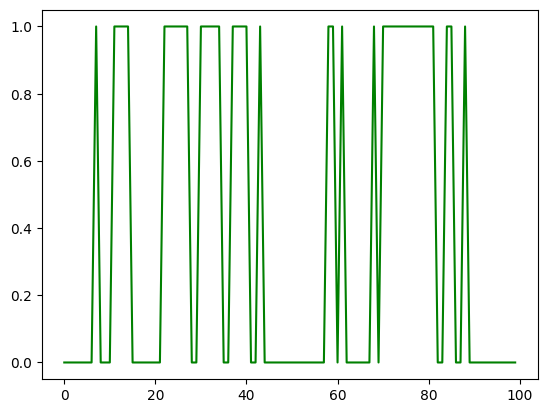

In [11]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target_binary('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+'Emiliani2'+'.csv')
plt.plot(target_df_trainVal.mean_std[:100], color='green')


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


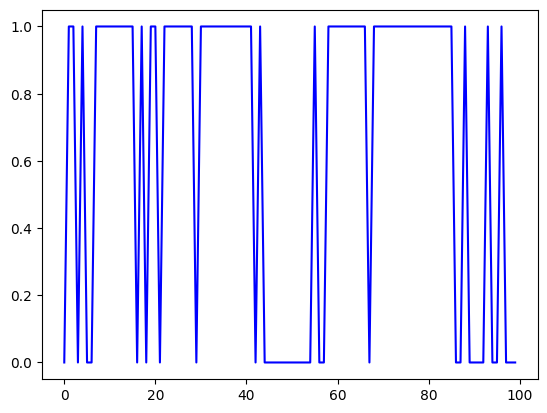

In [13]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+'Emiliani2'+'.csv')
target_df_trainVal['mean_std'] = target_df_trainVal.apply(lambda x: 1 if x.mean_std>=0 else 0, axis=1)
plt.plot(target_df_trainVal.mean_std[:100], color='blue')

In [6]:
### BOTH
path_target = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/csv_VHI/'
basins = ['Adda','Dora','Emiliani1','Emiliani2','Garda_Mincio','Lambro_Olona','Oglio_Iseo','Piemonte_Nord','Piemonte_Sud','Ticino']
path_features='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'

for basin in basins:
    print('####################' + basin + '####################')

    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target_binary('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+basin+'.csv')
    eps = 0.37
    actual_path = path_features+basin+'_aggreg.csv'
        
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(actual_path,['cyclostationary_mean_tg', 
                                                                             'cyclostationary_mean_tg_1w',
                                                                             'cyclostationary_mean_tg_4w', 
                                                                             'cyclostationary_mean_tg_8w',
                                                                             'cyclostationary_mean_tg_12w', 
                                                                             'cyclostationary_mean_tg_16w',
                                                                             'cyclostationary_mean_tg_24w',
                                                                             'cyclostationary_mean_rr', 
                                                                             'cyclostationary_mean_rr_1w',
                                                                             'cyclostationary_mean_rr_4w', 
                                                                             'cyclostationary_mean_rr_8w',
                                                                             'cyclostationary_mean_rr_12w', 
                                                                             'cyclostationary_mean_rr_16w',
                                                                             'cyclostationary_mean_rr_24w'
                                                                            ],
                                                                       target_df_trainVal, eps=eps,
                                                                       max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
        
    selected_colnames = FS_with_logisticWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    print('\nFull model and selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_train_originalTarget.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_val_originalTarget.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_test_originalTarget.csv'
    aggregate_trainVal.loc[:410,selected_colnames[0:5]].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames[0:5]].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames[0:5]].to_csv(test_string, index=False)

    res = {
            "delta" : [], 
            "numSelected" : [], 
            "selectedFeatures" : [] 
        }
        
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    
    print('\nFull model and selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_train_originalTarget.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_val_originalTarget.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_test_originalTarget.csv'
            
    aggregate_trainVal.loc[:410,selected_colnames[0:5]].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames[0:5]].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames[0:5]].to_csv(test_string, index=False)
#
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_train_originalTarget.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_val_originalTarget.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_test_originalTarget.csv'
        
    aggregate_trainVal.loc[:410,selected_colnames].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames].to_csv(test_string, index=False)



####################Adda####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.039373    0.00  2001     1         0
1    2001-01-13  0.380618    0.43  2001     2         0
2    2001-01-21  0.341985    0.38  2001     3         0
3    2001-01-29  0.322044    0.35  2001     5         0
4    2001-02-06  0.354954    0.40  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.382706    0.40  2009    48         0
407  2009-12-05  0.409921    0.46  2009    49         0
408  2009-12-13  0.472087    0.53  2009    50         0
409  2009-12-21  0.324728    0.00  2009    52         0
410  2009-12-29  0.086512    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 92

Number of aggregated features: 8

Number of features: 92

1
3
Number of aggregated features: 3

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7824726134585289, test score: 0.6228070175438597
Aggregate classification train score with FS: 0.7245696400625978, test score: 0.7236842105263158
----- MI Scores -----
[(6, 0.10284129374579794), (1, 0.0896471767520686), (5, 0.08543709822941843), (2, 0.08511777607703365), (4, 0.08410788649679392), (42, 0.08208379875345556), (7, 0.08189942097275459), (48, 0.08154405886084899), (0, 0.0756297811461879), (43, 0.07324709500666189), (3, 0.0709986764628222), (51, 0.07032702618198375), (10, 0.07031777625078875), (49, 0.0698573144997709), (40, 0.0666392585389421), (53, 0.06616520445361927), (44, 0.06614016723647162), (50, 0.06385769960661201), (9, 0.06326611983347566), (45, 0.0629918836257458), (54, 0.06206100698976432), (16, 0.05875725350096574), (52, 0.05575613676857631), (8, 0.055209968201738076), (46, 0.05430319377284911), (11, 0.05040672140166815), (12, 0.04794912514273228), (70, 0.046512310671754674), (55, 0.04446373880727995), (47, 0.0438030261

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7824726134585289, test score: 0.6228070175438597
Aggregate classification train score with FS: 0.7198748043818466, test score: 0.706140350877193
####################Dora####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.010645    0.00  2001     1         0
1    2001-01-13  0.206769    0.00  2001     2         0
2    2001-01-21  0.267313    0.00  2001     3         0
3    2001-01-29  0.240836    0.20  2001     5         0
4    2001-02-06  0.193417    0.15  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.230073    0.25  2009    48         0
407  2009-12-05  0.243632    0.24  2009    49         0
408  2009-12-13  0.251111    0.00  2009    50         0
409  2009-12-21  0.099246    0.00  2009    52         0
410  2009-12-29  0.064990    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_rr_4w_1', 'cyclostationary_mean_tg_4w_0', 'cyclostationary_mean_rr_8w_1', 'cyclostationary_mean_tg_24w_2', 'cyclostationary_mean_tg_8w_2', 'cyclostationary_mean_tg_4w_3', 'cyclostationary_mean_tg_12w_2', 'cyclostationary_mean_tg_16w_0', 'cyclostationary_mean_tg_8w_0', 'cyclostationary_mean_rr_1w_1', 'cyclostationary_mean_tg_4w_1', 'cyclostationary_mean_tg_4w_2', 'cyclostationary_mean_rr_24w_2'], 

validation score: 0.793859649122807, 

number of selected features: 13

Full model and selected features with wrapper

Full aggregate classification train score: 0.7996870109546166, test score: 0.4824561403508772
Aggregate classification train score with FS: 0.7981220657276995, test score: 0.4868421052631579

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.7996870109546166, test score: 0.4824561403508772
Aggregate classification train score with FS: 0.7762128325508607, test score: 0.6052631578947368
----- MI Scores -----
[(1, 0.06407365263527114), (5, 0.0636623717117708), (42, 0.05921946350357135), (2, 0.0570325946718382), (0, 0.054147133319349845), (4, 0.05402418372361449), (3, 0.0519981908134276), (37, 0.05199117790851141), (32, 0.04911614213624265), (29, 0.04814467382162491), (34, 0.04649586327203963), (10, 0.04528462330143793), (36, 0.04326781553794242), (28, 0.04119457092913945), (9, 0.04052288603344408), (27, 0.04012086175338014), (39, 0.038290312410297), (6, 0.03760391713662458), (25, 0.03529848456256848), (40, 0.034969682909787594), (33, 0.033194701715182226), (43, 0.03246054739175569), (24, 0.032264234117460905), (35, 0.03121464023853597), (26, 0.030507076249573262), (31, 0.029051421850577762), (8, 0.0285999943396888), (30, 0.027501780310230435), (7, 0.02599531909200948), (17, 0.02378

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7996870109546166, test score: 0.4824561403508772
Aggregate classification train score with FS: 0.7652582159624414, test score: 0.6447368421052632
####################Emiliani1####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.379890    0.50  2001     1         0
1    2001-01-13  0.482679    0.58  2001     2         0
2    2001-01-21  0.516259    0.59  2001     3         1
3    2001-01-29  0.434421    0.50  2001     5         0
4    2001-02-06  0.494805    0.54  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.427085    0.43  2009    48         0
407  2009-12-05  0.547380    0.57  2009    49         1
408  2009-12-13  0.531070    0.58  2009    50         1
409  2009-12-21  0.295704    0.00  2009    52         0
410  2009-12-29  0.027861    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), 

Highest CMI score: -0.0021049911789650377

[2, 39, 24, 34, 21, 26]


Full model and selected features with CMI

Full aggregate classification train score: 0.8137715179968701, test score: 0.6929824561403509
Aggregate classification train score with FS: 0.7433489827856025, test score: 0.7017543859649122

Full model and best 5 selected features with CMI

Full aggregate classification train score: 0.8137715179968701, test score: 0.6929824561403509
Aggregate classification train score with FS: 0.7417840375586855, test score: 0.7017543859649122
####################Emiliani2####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1         0
1    2001-01-13  0.484737    0.52  2001     2         0
2    2001-01-21  0.466071    0.47  2001     3         0
3    2001-01-29  0.417470    0.44  2001     5         0
4    2001-02-06  0.492202    0.53  2001     6         0
..          ...       ...     ...   ...   ...       .

Highest CMI score: 0.0004164344296093969
Adding original feature: 23
CMI: 0.0014519911378219341
Highest CMI score: 0.0014519911378219341
Adding original feature: 4
Highest CMI score: -0.00388805315789717

[25, 5, 18, 38, 22, 20, 31, 23, 4]


Full model and selected features with CMI

Full aggregate classification train score: 0.7621283255086072, test score: 0.6403508771929824
Aggregate classification train score with FS: 0.730829420970266, test score: 0.7456140350877193

Full model and best 5 selected features with CMI

Full aggregate classification train score: 0.7621283255086072, test score: 0.6403508771929824
Aggregate classification train score with FS: 0.7057902973395931, test score: 0.7149122807017544
####################Garda_Mincio####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.102270    0.00  2001     1         0
1    2001-01-13  0.454431    0.53  2001     2         0
2    2001-01-21  0.323514    0.32  2001     3 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_2', 'cyclostationary_mean_rr_1w_2', 'cyclostationary_mean_rr_8w_0', 'cyclostationary_mean_tg_0', 'cyclostationary_mean_tg_12w_0', 'cyclostationary_mean_rr_4w_1', 'cyclostationary_mean_tg_12w_7', 'cyclostationary_mean_tg_8w_2', 'cyclostationary_mean_tg_8w_1', 'cyclostationary_mean_rr_16w_2', 'cyclostationary_mean_rr_8w_3', 'cyclostationary_mean_tg_1w_2', 'cyclostationary_mean_rr_16w_5', 'cyclostationary_mean_rr_24w_3', 'cyclostationary_mean_rr_12w_2', 'cyclostationary_mean_rr_16w_4', 'cyclostationary_mean_rr_24w_0'], 

validation score: 0.7149122807017544, 

number of selected features: 17

Full model and selected features with wrapper

Full aggregate classification train score: 0.8356807511737089, test score: 0.5833333333333334
Aggregate classification train score with FS: 0.7762128325508607, test score: 0.6973684210526315

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8356807511737089, test score: 0.5833333333333334
Aggregate classification train score with FS: 0.7511737089201878, test score: 0.6973684210526315
----- MI Scores -----
[(37, 0.09279239483677651), (38, 0.08478769528063688), (42, 0.07988187025393495), (40, 0.06908944590463272), (1, 0.06657386310311653), (4, 0.06273153449895094), (5, 0.057453946592833746), (2, 0.05693114478667651), (7, 0.0559586082969584), (46, 0.053889349882112386), (39, 0.05083416042322031), (45, 0.05069473653485026), (9, 0.048930797806460834), (6, 0.048139440819167684), (48, 0.046715458341035646), (52, 0.04596801525723159), (44, 0.04544442384704062), (13, 0.043668603941682975), (51, 0.043232224824648065), (0, 0.04024810382556043), (67, 0.03732934340133936), (50, 0.03697893274836503), (3, 0.03683952459771397), (54, 0.03614815098825614), (41, 0.03511240549634156), (20, 0.03479158083049171), (64, 0.03420261884503425), (69, 0.03390260821403396), (32, 0.033359654992365165), (70, 

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8356807511737089, test score: 0.5833333333333334
Aggregate classification train score with FS: 0.7449139280125195, test score: 0.6842105263157895
####################Lambro_Olona####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.369625    0.45  2001     1         0
1    2001-01-13  0.429563    0.43  2001     2         0
2    2001-01-21  0.470784    0.48  2001     3         0
3    2001-01-29  0.370358    0.37  2001     5         0
4    2001-02-06  0.372263    0.37  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.402059    0.40  2009    48         0
407  2009-12-05  0.389658    0.39  2009    49         0
408  2009-12-13  0.545184    0.56  2009    50         1
409  2009-12-21  0.447916    0.55  2009    52         0
410  2009-12-29  0.277300    0.32  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_tg_1w_3', 'cyclostationary_mean_tg_16w_0', 'cyclostationary_mean_tg_1w_4'], 

validation score: 0.8026315789473685, 

number of selected features: 5

Full model and selected features with wrapper

Full aggregate classification train score: 0.7777777777777778, test score: 0.5964912280701754
Aggregate classification train score with FS: 0.7417840375586855, test score: 0.6578947368421053

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.7777777777777778, test score: 0.5964912280701754
Aggregate classification train score with FS: 0.7417840375586855, test score: 0.6578947368421053
----- MI Scores -----
[(46, 0.11363223985649906), (6, 0.09992292172902013), (11, 0.09965830942712461), (17, 0.09805235964171415), (14, 0.0940072351694925), (5, 0.09378381255879152), (15, 0.09080952631305034), (2, 0.08532766091019797), (3, 0.08358479591289476), (45, 0.08352814088564486), (16, 0.08153448461557869), (7, 0.0814231296086688), (9, 0.08126044593323434), (0, 0.08065751710328715), (13, 0.07822756527544664), (4, 0.07668267219368051), (12, 0.07648406960026555), (47, 0.07234840158496054), (1, 0.07232356654848363), (19, 0.07011995266290884), (10, 0.06916549725950763), (8, 0.06882777406135292), (21, 0.06390605376369587), (20, 0.06300279520299022), (64, 0.05657140061692869), (62, 0.05234003595941975), (44, 0.0520742893675204), (30, 0.048998820197491876), (54, 0.04880244213226596), (59, 0.04877199

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7777777777777778, test score: 0.5964912280701754
Aggregate classification train score with FS: 0.7214397496087637, test score: 0.6885964912280702
####################Oglio_Iseo####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.243674    0.26  2001     1         0
1    2001-01-13  0.424116    0.44  2001     2         0
2    2001-01-21  0.393786    0.39  2001     3         0
3    2001-01-29  0.314939    0.31  2001     5         0
4    2001-02-06  0.464902    0.48  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.465734    0.48  2009    48         0
407  2009-12-05  0.447390    0.47  2009    49         0
408  2009-12-13  0.556760    0.59  2009    50         1
409  2009-12-21  0.307880    0.00  2009    52         0
410  2009-12-29  0.034211    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6),

CMI: 0.00859307439998247
CMI: 0.005563590979484334
CMI: 0.005158578890928467
CMI: 0.0012885980172467892
CMI: 0.0097134229073772
CMI: 0.0005990425704172075
CMI: 0.005339010938551908
CMI: 0.008657466699383692
CMI: 0.0014108998022039354
CMI: 0.0056232977086306535
CMI: 0.007577286697313224
CMI: 0.004643499995887396
Highest CMI score: 0.010955505967058438
Adding original feature: 22
CMI: 0.001682189875797907
CMI: 0.0027157443427435757
CMI: 0.0036086517148238573
CMI: 0.001802217006104001
CMI: 0.003972051163019241
CMI: 0.0014893899392973142
CMI: 0.001440801041031614
CMI: 0.00794694189127293
CMI: 0.003280438800148222
CMI: 0.00019058687888054426
CMI: 0.0008282081215271742
CMI: 0.0038666207133058184
CMI: 0.0014674437247697014
Highest CMI score: 0.00794694189127293
Adding original feature: 29
CMI: 0.00019512228763757244
CMI: 0.009320624129425498
CMI: 0.0016005262689588184
CMI: 0.009575463458277145
CMI: 0.006399833614413819
CMI: 0.009451114351509748
CMI: 0.0048983446593924285
CMI: 0.00461059026915

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_rr_1w_3', 'cyclostationary_mean_rr_1w_4', 'cyclostationary_mean_tg_12w_4', 'cyclostationary_mean_tg_12w_2', 'cyclostationary_mean_tg_1w_2', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_tg_16w_2', 'cyclostationary_mean_rr_24w_1', 'cyclostationary_mean_tg_4w_2', 'cyclostationary_mean_tg_4w_5', 'cyclostationary_mean_rr_24w_2'], 

validation score: 0.7631578947368421, 

number of selected features: 12

Full model and selected features with wrapper

Full aggregate classification train score: 0.7433489827856025, test score: 0.5833333333333334
Aggregate classification train score with FS: 0.6995305164319249, test score: 0.6008771929824561

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.7433489827856025, test score: 0.5833333333333334
Aggregate classification train score with FS: 0.676056338028169, test score: 0.5745614035087719
----- MI Scores -----
[(8, 0.09870081875955551), (1, 0.09447509539074571), (2, 0.09429738414127868), (4, 0.0908883880126618), (5, 0.09087269545598836), (3, 0.08751943477789732), (6, 0.08494060261871211), (7, 0.08274067694836573), (0, 0.07372946270316685), (55, 0.06416968140047379), (54, 0.06285219149916642), (9, 0.05837610627660019), (56, 0.052805876199233256), (79, 0.052063968497591644), (78, 0.05166069337394451), (15, 0.05065058045374848), (71, 0.050312277300491225), (35, 0.048767101234121035), (14, 0.04811339145200326), (61, 0.04750947982237214), (27, 0.045973008967485296), (69, 0.044797833308607475), (12, 0.044766503342090265), (17, 0.043548925806679954), (22, 0.04352583540129977), (13, 0.04296626812017346), (77, 0.04248367809555123), (65, 0.042378009220468464), (75, 0.04206197386787004), (74, 0

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.7433489827856025, test score: 0.5833333333333334
Aggregate classification train score with FS: 0.7136150234741784, test score: 0.5877192982456141

Full model and best 5 selected features with CMI



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.7433489827856025, test score: 0.5833333333333334
Aggregate classification train score with FS: 0.6791862284820032, test score: 0.6140350877192983
####################Piemonte_Sud####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.278060    0.09  2001     1         0
1    2001-01-13  0.445159    0.48  2001     2         0
2    2001-01-21  0.488982    0.52  2001     3         0
3    2001-01-29  0.362487    0.37  2001     5         0
4    2001-02-06  0.430732    0.45  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.430379    0.44  2009    48         0
407  2009-12-05  0.419919    0.43  2009    49         0
408  2009-12-13  0.526648    0.55  2009    50         1
409  2009-12-21  0.457440    0.61  2009    52         0
410  2009-12-29  0.301938    0.38  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_rr_4w_2', 'cyclostationary_mean_tg_16w_1', 'cyclostationary_mean_rr_24w_5', 'cyclostationary_mean_rr_8w_0', 'cyclostationary_mean_rr_16w_0', 'cyclostationary_mean_tg_4w_3', 'cyclostationary_mean_tg_8w_0', 'cyclostationary_mean_tg_8w_2', 'cyclostationary_mean_tg_4w_1', 'cyclostationary_mean_rr_24w_6', 'cyclostationary_mean_rr_1w_0', 'cyclostationary_mean_tg_16w_0', 'cyclostationary_mean_tg_8w_1', 'cyclostationary_mean_tg_16w_2', 'cyclostationary_mean_tg_12w_1', 'cyclostationary_mean_tg_24w_1'], 

validation score: 0.7982456140350878, 

number of selected features: 17

Full model and selected features with wrapper

Full aggregate classification train score: 0.7777777777777778, test score: 0.5526315789473685
Aggregate classification train score with FS: 0.7057902973395931, test score: 0.5877192982456141

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.7777777777777778, test score: 0.5526315789473685
Aggregate classification train score with FS: 0.7057902973395931, test score: 0.5964912280701754
----- MI Scores -----
[(33, 0.09484838424028581), (2, 0.07311615503929382), (0, 0.07124262884750815), (34, 0.06312697536864169), (4, 0.06261038478387052), (1, 0.06087304473831301), (6, 0.059867826147481686), (48, 0.053979772467790454), (62, 0.05280839634789922), (55, 0.04777634926657979), (3, 0.047523133639802255), (52, 0.04718405596383203), (45, 0.04716837988678104), (40, 0.04609568964298823), (5, 0.045945006492462755), (12, 0.04578244773764485), (54, 0.04212227834451683), (64, 0.040811109370739396), (53, 0.03942816210642302), (22, 0.03520382524936086), (7, 0.03490332965454364), (58, 0.033290581370555544), (8, 0.03284258248528091), (32, 0.03278033734333205), (56, 0.0325624043107346), (43, 0.0305743044499297), (24, 0.030458189080073084), (60, 0.02919384108706322), (11, 0.028796680749380715), (29, 0

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7777777777777778, test score: 0.5526315789473685
Aggregate classification train score with FS: 0.6964006259780907, test score: 0.5614035087719298
####################Ticino####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.264043    0.00  2001     1         0
1    2001-01-13  0.354618    0.39  2001     2         0
2    2001-01-21  0.427990    0.47  2001     3         0
3    2001-01-29  0.339495    0.35  2001     5         0
4    2001-02-06  0.324134    0.34  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.332713    0.35  2009    48         0
407  2009-12-05  0.370253    0.40  2009    49         0
408  2009-12-13  0.517201    0.57  2009    50         1
409  2009-12-21  0.353636    0.45  2009    52         0
410  2009-12-29  0.261079    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (22

# Repeat the two cases with snow

In [7]:
### BOTH
path_target = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/csv_VHI/'
basins = ['Adda','Dora','Piemonte_Nord','Piemonte_Sud','Ticino']
path_features='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'
path_features_snow='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/snow_aggreg_ARPA/all_coord/'

for basin in basins:
    print('####################' + basin + '####################')

    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+basin+'.csv')
    target_df_trainVal['mean_std'] = target_df_trainVal.apply(lambda x: np.sign(x.mean_std), axis=1)
    eps = 0.37
    actual_path = path_features+basin+'_aggreg.csv'
    snow_actual_path = path_features_snow+basin+'_snowDepth_aggreg_allCoord.csv'

    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(actual_path,['cyclostationary_mean_tg', 
                                                                             'cyclostationary_mean_tg_1w',
                                                                             'cyclostationary_mean_tg_4w', 
                                                                             'cyclostationary_mean_tg_8w',
                                                                             'cyclostationary_mean_tg_12w', 
                                                                             'cyclostationary_mean_tg_16w',
                                                                             'cyclostationary_mean_tg_24w',
                                                                             'cyclostationary_mean_rr', 
                                                                             'cyclostationary_mean_rr_1w',
                                                                             'cyclostationary_mean_rr_4w', 
                                                                             'cyclostationary_mean_rr_8w',
                                                                             'cyclostationary_mean_rr_12w', 
                                                                             'cyclostationary_mean_rr_16w',
                                                                             'cyclostationary_mean_rr_24w'
                                                                            ],
                                                                       target_df_trainVal, eps=eps,
                                                                       max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
    output_snow,aggregate_trainVal_snow,aggregate_test_snow = aggregate_unfolded_data(snow_actual_path,['cyclostationary_mean_HS', 
                                                                             'cyclostationary_mean_HS_1w',
                                                                             'cyclostationary_mean_HS_4w', 
                                                                             'cyclostationary_mean_HS_8w',
                                                                             'cyclostationary_mean_HS_12w', 
                                                                             'cyclostationary_mean_HS_16w',
                                                                             'cyclostationary_mean_HS_24w'
                                                                            ],
                                                                       target_df_trainVal, eps=eps,
                                                                       max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
    
    aggregate_trainVal = pd.concat((aggregate_trainVal_snow,aggregate_trainVal),axis=1)
    aggregate_test = pd.concat((aggregate_test_snow,aggregate_test),axis=1)
    
    selected_colnames = FS_with_logisticWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    print('\nFull model and selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_train_withSnow_class.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_val_withSnow_class.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_test_withSnow_class.csv'
    aggregate_trainVal.loc[:410,selected_colnames[0:5]].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames[0:5]].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames[0:5]].to_csv(test_string, index=False)

    res = {
            "delta" : [], 
            "numSelected" : [], 
            "selectedFeatures" : [] 
        }
        
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    
    print('\nFull model and selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_train_withSnow_class.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_val_withSnow_class.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_test_withSnow_class.csv'
            
    aggregate_trainVal.loc[:410,selected_colnames[0:5]].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames[0:5]].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames[0:5]].to_csv(test_string, index=False)

    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_train_withSnow_class.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_val_withSnow_class.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_test_withSnow_class.csv'
        
    aggregate_trainVal.loc[:410,selected_colnames].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames].to_csv(test_string, index=False)


####################Adda####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.039373    0.00  2001     1 -2.546951
1    2001-01-13  0.380618    0.43  2001     2 -0.277191
2    2001-01-21  0.341985    0.38  2001     3 -0.534156
3    2001-01-29  0.322044    0.35  2001     5 -0.666789
4    2001-02-06  0.354954    0.40  2001     6 -0.447894
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.382706    0.40  2009    48 -0.263306
407  2009-12-05  0.409921    0.46  2009    49 -0.082282
408  2009-12-13  0.472087    0.53  2009    50  0.331204
409  2009-12-21  0.324728    0.00  2009    52 -0.648940
410  2009-12-29  0.086512    0.00  2009    53 -2.233412

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 92

1
1
1
1
1
1
1
1
4
Number of aggregated features: 4

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
3
Number of aggregated features: 3

Number of features: 92

1
1


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8075117370892019, test score: 0.5350877192982456
Aggregate classification train score with FS: 0.6525821596244131, test score: 0.6710526315789473
----- MI Scores -----
[(1, 0.16566900189993708), (3, 0.15411505651538857), (0, 0.14632293166074858), (10, 0.14628745409851718), (4, 0.1407824759966061), (5, 0.13935487261063437), (6, 0.12076623015697252), (8, 0.11363133777963362), (2, 0.1078676800433197), (11, 0.10626245294704353), (13, 0.10055411151821879), (9, 0.09626933637648617), (7, 0.09404596940653762), (15, 0.07507738068616561), (70, 0.07283001538846562), (73, 0.06978447136420662), (35, 0.06576019815159369), (38, 0.06215061234212111), (12, 0.059040967337141245), (16, 0.057837252794561256), (36, 0.05289706686324497), (37, 0.05174723645930736), (120, 0.04705829262630816), (40, 0.04696456185711878), (14, 0.046804242073322615), (72, 0.04568975691022552), (124, 0.04535367294037398), (41, 0.04420862733417661), (33, 0.04110012503725995), (18, 0.039

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8075117370892019, test score: 0.5350877192982456
Aggregate classification train score with FS: 0.5915492957746479, test score: 0.5789473684210527
####################Dora####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.010645    0.00  2001     1 -2.129508
1    2001-01-13  0.206769    0.00  2001     2 -0.927136
2    2001-01-21  0.267313    0.00  2001     3 -0.555958
3    2001-01-29  0.240836    0.20  2001     5 -0.718282
4    2001-02-06  0.193417    0.15  2001     6 -1.008995
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.230073    0.25  2009    48 -0.784269
407  2009-12-05  0.243632    0.24  2009    49 -0.701139
408  2009-12-13  0.251111    0.00  2009    50 -0.655289
409  2009-12-21  0.099246    0.00  2009    52 -1.586325
410  2009-12-29  0.064990    0.00  2009    53 -1.796340

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228,

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7089201877934272, test score: 0.42543859649122806
Aggregate classification train score with FS: 0.5852895148669797, test score: 0.4956140350877193
----- MI Scores -----
[(1, 0.274261588151655), (4, 0.2507009614004688), (7, 0.2323716977642604), (3, 0.22684103307013906), (0, 0.22585107281290542), (6, 0.2129634343863514), (2, 0.19451787118272829), (10, 0.18673314796624924), (9, 0.1810776169608548), (5, 0.15316704714200055), (8, 0.1425822502359349), (13, 0.11898256025707388), (12, 0.08420820321347194), (11, 0.0793495184558168), (14, 0.07493314541744835), (16, 0.07406738100194246), (23, 0.06746926839841152), (44, 0.04899586674729079), (26, 0.04627486834023934), (60, 0.04602026463150236), (25, 0.045084184717892106), (28, 0.04388572899391332), (70, 0.04094518283345941), (67, 0.040013009531334486), (17, 0.03975091404714736), (20, 0.03929924444910933), (56, 0.03763561283735838), (15, 0.036935078357804074), (54, 0.032998946660021976), (74, 0.032927842

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7089201877934272, test score: 0.42543859649122806
Aggregate classification train score with FS: 0.4225352112676056, test score: 0.4692982456140351
####################Piemonte_Nord####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.278983    0.00  2001     1 -1.146332
1    2001-01-13  0.494910    0.51  2001     2  0.371173
2    2001-01-21  0.496092    0.51  2001     3  0.379474
3    2001-01-29  0.427992    0.43  2001     5 -0.099118
4    2001-02-06  0.400512    0.41  2001     6 -0.292244
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.363952    0.37  2009    48 -0.549184
407  2009-12-05  0.400487    0.40  2009    49 -0.292423
408  2009-12-13  0.506771    0.52  2009    50  0.454529
409  2009-12-21  0.387530    0.53  2009    52 -0.383480
410  2009-12-29  0.279894    0.27  2009    53 -1.139931

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639,

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7965571205007824, test score: 0.5964912280701754
Aggregate classification train score with FS: 0.6713615023474179, test score: 0.6359649122807017
----- MI Scores -----
[(6, 0.22992309740299527), (5, 0.21682534744943052), (0, 0.20648092036053264), (8, 0.16033204451061742), (14, 0.15919013942720192), (7, 0.15900850716874246), (13, 0.13033781622985435), (4, 0.12108049669876571), (15, 0.11847425054410846), (3, 0.11056867351178358), (10, 0.109102741184146), (21, 0.10386697716709256), (11, 0.09911890432433872), (2, 0.08553625800782601), (1, 0.07854238177271229), (16, 0.07737999451036957), (27, 0.07160452677225713), (99, 0.0696552299811048), (12, 0.06642798813699634), (19, 0.06524050330848714), (114, 0.06489417909526018), (22, 0.0647775973720923), (93, 0.06390412024251571), (95, 0.06367830497467163), (9, 0.06208694745187174), (96, 0.06196935676862346), (43, 0.06195971101675305), (102, 0.060353017962879424), (35, 0.060273692408838515), (98, 0.060105

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7965571205007824, test score: 0.5964912280701754
Aggregate classification train score with FS: 0.5821596244131455, test score: 0.5570175438596491
####################Piemonte_Sud####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.278060    0.09  2001     1 -0.967137
1    2001-01-13  0.445159    0.48  2001     2  0.070382
2    2001-01-21  0.488982    0.52  2001     3  0.342478
3    2001-01-29  0.362487    0.37  2001     5 -0.442927
4    2001-02-06  0.430732    0.45  2001     6 -0.019192
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.430379    0.44  2009    48 -0.021388
407  2009-12-05  0.419919    0.43  2009    49 -0.086330
408  2009-12-13  0.526648    0.55  2009    50  0.576347
409  2009-12-21  0.457440    0.61  2009    52  0.146632
410  2009-12-29  0.301938    0.38  2009    53 -0.818877

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8544600938967136, test score: 0.4956140350877193
Aggregate classification train score with FS: 0.6744913928012519, test score: 0.6798245614035088
----- MI Scores -----
[(9, 0.1480380750513006), (2, 0.14742786019050294), (17, 0.14639983993634487), (12, 0.13845427533881186), (47, 0.13094677516561737), (27, 0.12863697683589112), (1, 0.12812066510992318), (32, 0.12597508465818597), (92, 0.12565880909695745), (11, 0.12173840342214166), (55, 0.11682354372606836), (10, 0.1145717898844093), (16, 0.11372443749894928), (62, 0.11337330518846934), (6, 0.11177098162044366), (7, 0.10837227786230659), (25, 0.10544183636908057), (59, 0.10451447819257711), (26, 0.10437075118631693), (23, 0.09992182092368206), (8, 0.09870151475176736), (48, 0.0985554130398701), (77, 0.09834460689011401), (42, 0.0977862683536163), (70, 0.09737954433837588), (40, 0.09679990814545839), (56, 0.09580225582143488), (58, 0.09480818908470293), (4, 0.094617514826413), (87, 0.094080263

Highest CMI score: 0.00709025297650967
Adding original feature: 21
CMI: 0.007663538343724852
CMI: 0.0002247035472716652
Highest CMI score: 0.007663538343724852
Adding original feature: 26
CMI: 1.4269637876485053e-05
CMI: 0.0004945079141440711
CMI: 0.002889317906079658
CMI: 0.00024584255350329487
Highest CMI score: 0.002889317906079658
Adding original feature: 33
CMI: 0.00011617861542473351
CMI: 0.005049965237840626
CMI: 0.0013904604867263082
CMI: 0.007757921248866262
CMI: 0.01046974480552032
CMI: 0.00855079959629712
CMI: 0.0034919621973222847
Highest CMI score: 0.01046974480552032
Adding original feature: 62
CMI: 0.005209685058597147
CMI: 0.005152104998825291
CMI: 0.015498632636534226
CMI: 0.0030246565106881174
CMI: 0.0007970196021236386
CMI: 0.0017047722997029502
CMI: 0.0008424345519273957
CMI: 0.0007836973667621483
CMI: 0.003962469177386796
CMI: 0.0003930515908004417
CMI: 0.010877698657826729
CMI: 0.007909027759424925
CMI: 0.003069790338807221
CMI: 0.0029401065206803856
Highest CMI s

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8544600938967136, test score: 0.4956140350877193
Aggregate classification train score with FS: 0.5899843505477308, test score: 0.5526315789473685
####################Ticino####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.264043    0.00  2001     1 -1.060146
1    2001-01-13  0.354618    0.39  2001     2 -0.405065
2    2001-01-21  0.427990    0.47  2001     3  0.125603
3    2001-01-29  0.339495    0.35  2001     5 -0.514438
4    2001-02-06  0.324134    0.34  2001     6 -0.625540
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.332713    0.35  2009    48 -0.563495
407  2009-12-05  0.370253    0.40  2009    49 -0.291984
408  2009-12-13  0.517201    0.57  2009    50  0.770822
409  2009-12-21  0.353636    0.45  2009    52 -0.412164
410  2009-12-29  0.261079    0.00  2009    53 -1.081585

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (22

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_tg_1w_1', 'cyclostationary_mean_tg_12w_0', 'cyclostationary_mean_tg_8w_0', 'cyclostationary_mean_tg_4w_7', 'cyclostationary_mean_tg_8w_4', 'cyclostationary_mean_HS_1w_2', 'cyclostationary_mean_rr_1w_1', 'cyclostationary_mean_tg_1w_0', 'cyclostationary_mean_HS_1', 'cyclostationary_mean_tg_16w_1', 'cyclostationary_mean_HS_2', 'cyclostationary_mean_HS_0', 'cyclostationary_mean_HS_24w_0', 'cyclostationary_mean_HS_4w_2', 'cyclostationary_mean_tg_16w_2', 'cyclostationary_mean_tg_12w_4', 'cyclostationary_mean_HS_8w_2', 'cyclostationary_mean_HS_1w_1', 'cyclostationary_mean_HS_12w_2', 'cyclostationary_mean_tg_4w_0', 'cyclostationary_mean_HS_12w_0', 'cyclostationary_mean_HS_24w_2', 'cyclostationary_mean_HS_8w_0', 'cyclostationary_mean_tg_4w_1', 'cyclostationary_mean_rr_24w_0', 'cyclostationary_mean_tg_8w_2', 'cyclostationary_mean_rr_0'], 

validation score: 0.8245614035087719, 

number of selected features: 27

Full model and selected features with wrap

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.7511737089201878, test score: 0.6271929824561403
Aggregate classification train score with FS: 0.6447574334898278, test score: 0.6973684210526315
----- MI Scores -----
[(3, 0.1569980537128593), (0, 0.13576849883442957), (2, 0.0915021389816008), (24, 0.0763234536076634), (29, 0.07212690205916393), (23, 0.07028585194925412), (6, 0.06858895407570223), (26, 0.06643443388585744), (28, 0.06329307871298487), (21, 0.0612092557291343), (25, 0.060858722509433257), (9, 0.06025808849519768), (55, 0.05871789878382834), (22, 0.05815706083531807), (27, 0.056323847793093886), (60, 0.054899875197957825), (12, 0.05147378600380178), (58, 0.05037022008290984), (56, 0.048958793309502306), (31, 0.04629049926461868), (19, 0.04569056426587614), (5, 0.045482425341490655), (77, 0.043381055201335235), (45, 0.04319332301250448), (8, 0.04166536496568641), (44, 0.04140224111744815), (17, 0.04029726563842682), (67, 0.03988064882554653), (66, 0.03928885623448532), (61, 0.0

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.7511737089201878, test score: 0.6271929824561403
Aggregate classification train score with FS: 0.6463223787167449, test score: 0.6008771929824561


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
### BOTH
path_target = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/csv_VHI/'
basins = ['Adda','Dora','Piemonte_Nord','Piemonte_Sud','Ticino']
path_features='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'
path_features_snow='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/snow_aggreg_ARPA/all_coord/'

for basin in basins:
    print('####################' + basin + '####################')

    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target_binary('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+basin+'.csv')
    eps = 0.37
    actual_path = path_features+basin+'_aggreg.csv'
    snow_actual_path = path_features_snow+basin+'_snowDepth_aggreg_allCoord.csv'

    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(actual_path,['cyclostationary_mean_tg', 
                                                                             'cyclostationary_mean_tg_1w',
                                                                             'cyclostationary_mean_tg_4w', 
                                                                             'cyclostationary_mean_tg_8w',
                                                                             'cyclostationary_mean_tg_12w', 
                                                                             'cyclostationary_mean_tg_16w',
                                                                             'cyclostationary_mean_tg_24w',
                                                                             'cyclostationary_mean_rr', 
                                                                             'cyclostationary_mean_rr_1w',
                                                                             'cyclostationary_mean_rr_4w', 
                                                                             'cyclostationary_mean_rr_8w',
                                                                             'cyclostationary_mean_rr_12w', 
                                                                             'cyclostationary_mean_rr_16w',
                                                                             'cyclostationary_mean_rr_24w'
                                                                            ],
                                                                       target_df_trainVal, eps=eps,
                                                                       max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
    output_snow,aggregate_trainVal_snow,aggregate_test_snow = aggregate_unfolded_data(snow_actual_path,['cyclostationary_mean_HS', 
                                                                             'cyclostationary_mean_HS_1w',
                                                                             'cyclostationary_mean_HS_4w', 
                                                                             'cyclostationary_mean_HS_8w',
                                                                             'cyclostationary_mean_HS_12w', 
                                                                             'cyclostationary_mean_HS_16w',
                                                                             'cyclostationary_mean_HS_24w'
                                                                            ],
                                                                       target_df_trainVal, eps=eps,
                                                                       max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
    
    aggregate_trainVal = pd.concat((aggregate_trainVal_snow,aggregate_trainVal),axis=1)
    aggregate_test = pd.concat((aggregate_test_snow,aggregate_test),axis=1)
    
    selected_colnames = FS_with_logisticWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,aggregate_trainVal.shape[1]-1), 228)

    print('\nFull model and selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with wrapper\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_train_snowOriginal.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_val_snowOriginal.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_wrapper_best5_test_snowOriginal.csv'
    aggregate_trainVal.loc[:410,selected_colnames[0:5]].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames[0:5]].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames[0:5]].to_csv(test_string, index=False)

    res = {
            "delta" : [], 
            "numSelected" : [], 
            "selectedFeatures" : [] 
        }
        
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    
    print('\nFull model and selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    print('\nFull model and best 5 selected features with CMI\n')
    compare_methods_class(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
        
    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_train_snowOriginal.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_val_snowOriginal.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_best5_CMI_test_snowOriginal.csv'
            
    aggregate_trainVal.loc[:410,selected_colnames[0:5]].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames[0:5]].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames[0:5]].to_csv(test_string, index=False)

    train_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_train_snowOriginal.csv'
    val_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_val_snowOriginal.csv'
    test_string = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features_classification/'+basin+'_GenLinCFA_CMI_test_snowOriginal.csv'
        
    aggregate_trainVal.loc[:410,selected_colnames].to_csv(train_string, index=False)
    aggregate_trainVal.loc[411:,selected_colnames].to_csv(val_string, index=False)
    aggregate_test.loc[:,selected_colnames].to_csv(test_string, index=False)



####################Adda####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.039373    0.00  2001     1         0
1    2001-01-13  0.380618    0.43  2001     2         0
2    2001-01-21  0.341985    0.38  2001     3         0
3    2001-01-29  0.322044    0.35  2001     5         0
4    2001-02-06  0.354954    0.40  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.382706    0.40  2009    48         0
407  2009-12-05  0.409921    0.46  2009    49         0
408  2009-12-13  0.472087    0.53  2009    50         0
409  2009-12-21  0.324728    0.00  2009    52         0
410  2009-12-29  0.086512    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 92

Number of aggregated features: 8

Number of features: 92

1
3
Number of aggregated features: 3

Number of features: 92

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8184663536776213, test score: 0.6491228070175439
Aggregate classification train score with FS: 0.7089201877934272, test score: 0.7105263157894737
----- MI Scores -----
[(1, 0.16462813494777176), (3, 0.15412904651364281), (5, 0.14776921732029508), (2, 0.14432665446092818), (6, 0.1373201807457125), (0, 0.13641286088236199), (10, 0.12846881225241108), (8, 0.12288438008621635), (9, 0.10582985200430282), (4, 0.10571436224424623), (11, 0.10497823291077493), (41, 0.10284129374579794), (7, 0.10243197240827986), (13, 0.09273642128902806), (36, 0.0896471767520686), (40, 0.08543709822941843), (37, 0.08511777607703365), (39, 0.08410788649679392), (77, 0.08208379875345556), (42, 0.08189942097275459), (83, 0.08154405886084899), (35, 0.0756297811461879), (78, 0.07324709500666189), (38, 0.0709986764628222), (86, 0.07032702618198375), (45, 0.07031777625078875), (84, 0.0698573144997709), (75, 0.0666392585389421), (88, 0.06616520445361927), (79, 0.066140167236

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8184663536776213, test score: 0.6491228070175439
Aggregate classification train score with FS: 0.6697965571205008, test score: 0.6052631578947368
####################Dora####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.010645    0.00  2001     1         0
1    2001-01-13  0.206769    0.00  2001     2         0
2    2001-01-21  0.267313    0.00  2001     3         0
3    2001-01-29  0.240836    0.20  2001     5         0
4    2001-02-06  0.193417    0.15  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.230073    0.25  2009    48         0
407  2009-12-05  0.243632    0.24  2009    49         0
408  2009-12-13  0.251111    0.00  2009    50         0
409  2009-12-21  0.099246    0.00  2009    52         0
410  2009-12-29  0.064990    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228,

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab



selected columns: ['cyclostationary_mean_rr_4w_1', 'cyclostationary_mean_tg_4w_0', 'cyclostationary_mean_rr_8w_1', 'cyclostationary_mean_tg_24w_2', 'cyclostationary_mean_HS_4w_0', 'cyclostationary_mean_HS_24w_2', 'cyclostationary_mean_tg_12w_0'], 

validation score: 0.7982456140350878, 

number of selected features: 7

Full model and selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8356807511737089, test score: 0.49122807017543857
Aggregate classification train score with FS: 0.7934272300469484, test score: 0.4868421052631579

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8356807511737089, test score: 0.49122807017543857
Aggregate classification train score with FS: 0.7887323943661971, test score: 0.5043859649122807
----- MI Scores -----
[(1, 0.23257055774193505), (6, 0.23220027214033262), (0, 0.22886120250258243), (3, 0.2248252916210059), (4, 0.22076608966603065), (2, 0.22060734084696834), (7, 0.2107565861273632), (10, 0.19103702057873187), (5, 0.19007197725972833), (9, 0.17258872331999658), (12, 0.13436765260249275), (8, 0.13303181405773512), (13, 0.1231736451125696), (11, 0.10675089353357888), (16, 0.06568500044136998), (22, 0.06407365263527114), (26, 0.0636623717117708), (63, 0.05921946350357135), (15, 0.058181338448978874), (23, 0.0570325946718382), (21, 0.054147133319349845), (25, 0.05402418372361449), (14, 0.053333632625893246), (24, 0.0519981908134276), (58, 0.05199117790851141), (53, 0.04911614213624265), (50, 0.04814467382162491), (55, 0.04649586327203963), (31, 0.04528462330143793), (57, 0.04326781

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8356807511737089, test score: 0.49122807017543857
Aggregate classification train score with FS: 0.7621283255086072, test score: 0.7543859649122807

Full model and best 5 selected features with CMI



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8356807511737089, test score: 0.49122807017543857
Aggregate classification train score with FS: 0.7621283255086072, test score: 0.7543859649122807
####################Piemonte_Nord####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.278983    0.00  2001     1         0
1    2001-01-13  0.494910    0.51  2001     2         0
2    2001-01-21  0.496092    0.51  2001     3         0
3    2001-01-29  0.427992    0.43  2001     5         0
4    2001-02-06  0.400512    0.41  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.363952    0.37  2009    48         0
407  2009-12-05  0.400487    0.40  2009    49         0
408  2009-12-13  0.506771    0.52  2009    50         1
409  2009-12-21  0.387530    0.53  2009    52         0
410  2009-12-29  0.279894    0.27  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639,

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8247261345852895, test score: 0.5964912280701754
Aggregate classification train score with FS: 0.758998435054773, test score: 0.6052631578947368

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8247261345852895, test score: 0.5964912280701754
Aggregate classification train score with FS: 0.6964006259780907, test score: 0.5964912280701754
----- MI Scores -----
[(0, 0.26714291259839845), (6, 0.22153129648573908), (7, 0.20961609254486674), (5, 0.19901423654002606), (13, 0.17058562682201914), (8, 0.16684069224222087), (14, 0.16354966575927113), (10, 0.14903706422567511), (4, 0.134146573664541), (15, 0.13283360328435212), (3, 0.1273759819570727), (2, 0.12518978677121953), (12, 0.11867589665103942), (27, 0.11755593853952481), (19, 0.11688073732246403), (11, 0.11338568277800577), (1, 0.11285623542582214), (35, 0.11194323810773489), (64, 0.09870081875955551), (9, 0.09762487526649781), (57, 0.09447509539074571), (21, 0.09440280247219011), (58, 0.09429738414127868), (18, 0.09233279040805983), (60, 0.0908883880126618), (61, 0.09087269545598836), (59, 0.08751943477789732), (16, 0.08594922307686687), (62, 0.08494060261871211), (63, 0.0827406769

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8247261345852895, test score: 0.5964912280701754
Aggregate classification train score with FS: 0.5993740219092332, test score: 0.5570175438596491
####################Piemonte_Sud####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.278060    0.09  2001     1         0
1    2001-01-13  0.445159    0.48  2001     2         0
2    2001-01-21  0.488982    0.52  2001     3         0
3    2001-01-29  0.362487    0.37  2001     5         0
4    2001-02-06  0.430732    0.45  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.430379    0.44  2009    48         0
407  2009-12-05  0.419919    0.43  2009    49         0
408  2009-12-13  0.526648    0.55  2009    50         1
409  2009-12-21  0.457440    0.61  2009    52         0
410  2009-12-29  0.301938    0.38  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8622848200312989, test score: 0.543859649122807
Aggregate classification train score with FS: 0.7151799687010955, test score: 0.5394736842105263

Full model and best 5 selected features with wrapper



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8622848200312989, test score: 0.543859649122807
Aggregate classification train score with FS: 0.6885758998435054, test score: 0.5877192982456141
----- MI Scores -----
[(2, 0.17699227750284863), (17, 0.16156796334098936), (12, 0.16144019217397873), (10, 0.14242706405913927), (25, 0.14229556369113644), (16, 0.1412330204950954), (1, 0.14089110193982368), (9, 0.1389544308182627), (27, 0.1347208942804048), (11, 0.1306938828308101), (74, 0.12949647451493532), (14, 0.1283850855503909), (85, 0.12450740486433877), (6, 0.12185288593640299), (32, 0.119471200430453), (15, 0.11930065307673249), (47, 0.11862206922437267), (8, 0.11731123452722803), (57, 0.11477230129026277), (23, 0.11427289769913675), (40, 0.11233892542132304), (77, 0.1122637466546801), (62, 0.11090404331924744), (4, 0.1105014102721263), (19, 0.1094672798297168), (72, 0.10901545419502787), (21, 0.10734463197827757), (0, 0.10649390481164828), (44, 0.10599427811442251), (100, 0.1032787408567

CMI: 0.006932347249664905
CMI: 0.052895303919458736
CMI: 0.0314474350517886
CMI: 0.01691312181580157
Highest CMI score: 0.08864238854373696
Adding original feature: 105
CMI: 0.01965855889790258
CMI: 0.025020436807304647
CMI: 0.015150025945895818
CMI: 0.000270035741012975
CMI: 0.0037754916178971976
CMI: 0.0012549646448316576
Highest CMI score: 0.025020436807304647
Adding original feature: 10
CMI: 0.004314345726487312
CMI: 0.0018241903858713382
Highest CMI score: 0.004314345726487312
Adding original feature: 17
CMI: 0.0015760528456899014
Highest CMI score: 0.0015760528456899014
Adding original feature: 25
CMI: 0.0013763895014168859
CMI: 0.0005235585261098574
Highest CMI score: 0.0013763895014168859
Adding original feature: 12
CMI: 0.00197667363946169
CMI: 2.4798811624315853e-05
Highest CMI score: 0.00197667363946169
Adding original feature: 1
CMI: 0.006090110357576617
Highest CMI score: 0.006090110357576617
Adding original feature: 32
Highest CMI score: -0.0022745977886109436

[2, 105, 1

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8622848200312989, test score: 0.543859649122807
Aggregate classification train score with FS: 0.6682316118935837, test score: 0.618421052631579

Full model and best 5 selected features with CMI



/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full aggregate classification train score: 0.8622848200312989, test score: 0.543859649122807
Aggregate classification train score with FS: 0.6666666666666666, test score: 0.6096491228070176
####################Ticino####################
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.264043    0.00  2001     1         0
1    2001-01-13  0.354618    0.39  2001     2         0
2    2001-01-21  0.427990    0.47  2001     3         0
3    2001-01-29  0.339495    0.35  2001     5         0
4    2001-02-06  0.324134    0.34  2001     6         0
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.332713    0.35  2009    48         0
407  2009-12-05  0.370253    0.40  2009    49         0
408  2009-12-13  0.517201    0.57  2009    50         1
409  2009-12-21  0.353636    0.45  2009    52         0
410  2009-12-29  0.261079    0.00  2009    53         0

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8231611893583725, test score: 0.7324561403508771
Aggregate classification train score with FS: 0.7464788732394366, test score: 0.7543859649122807
----- MI Scores -----
[(0, 0.17618310631293277), (3, 0.1665764221355389), (5, 0.12178205148607435), (2, 0.10212509842529943), (29, 0.09206835986017393), (26, 0.08847810665941101), (33, 0.08813471732812701), (35, 0.08776558482052997), (57, 0.08575173716505455), (6, 0.0854664494432104), (31, 0.085353633462138), (27, 0.08422159096814694), (24, 0.083161497579558), (36, 0.0817677947807147), (25, 0.07973673242121916), (32, 0.07952429215523062), (60, 0.0788205605066191), (13, 0.07545844983691687), (59, 0.07387264505865068), (23, 0.07215960278083039), (9, 0.07028895594547621), (34, 0.06752548730533162), (30, 0.06268328545655451), (22, 0.060644014302589026), (16, 0.05605015662912839), (28, 0.0559567811013611), (56, 0.05521241330805112), (20, 0.04843834312736901), (61, 0.04520611525468225), (64, 0.0445263347

/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Full aggregate classification train score: 0.8231611893583725, test score: 0.7324561403508771
Aggregate classification train score with FS: 0.7230046948356808, test score: 0.7368421052631579

Full model and best 5 selected features with CMI

Full aggregate classification train score: 0.8231611893583725, test score: 0.7324561403508771
Aggregate classification train score with FS: 0.7230046948356808, test score: 0.7368421052631579


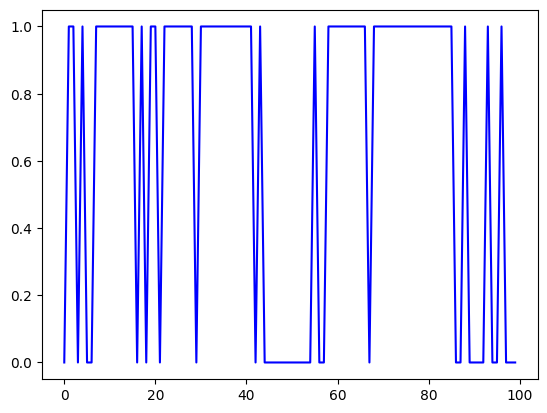

In [14]:
plt.plot(target_df_trainVal.mean_std[:100], color='blue')

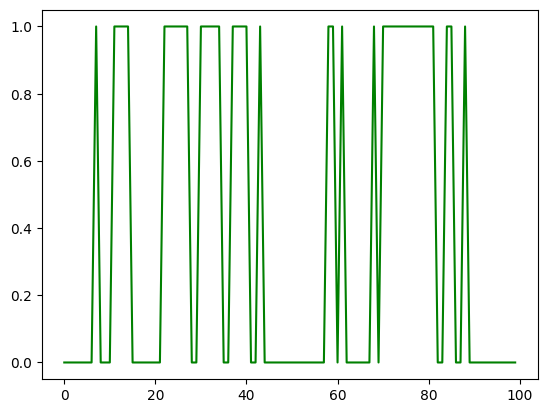

In [12]:
plt.plot(target_df_trainVal.mean_std[:100], color='green')